In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import quandl
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Enter desired start and end dates

In [2]:
start = dt.datetime(2017, 3, 31)
end = dt.datetime.now()
num_months = (end.year - start.year) * 12 + (end.month - start.month)
print('Number of months in range:', num_months)

Number of months in range: 37


# USA

### PMI

In [3]:
df_PMI = quandl.get("ISM/MAN_PMI", authtoken="kFwyRwmqZyPsHBzdpNov")
df_PMI.rename(columns={'VALUE': "PMI"}, inplace=True)
df_PMI = df_PMI[-num_months:]
df_PMI.tail()

,PMI
Date,
2019-11-01,48.1
2019-12-01,47.8
2020-01-01,50.9
2020-02-01,50.1
2020-03-01,49.1


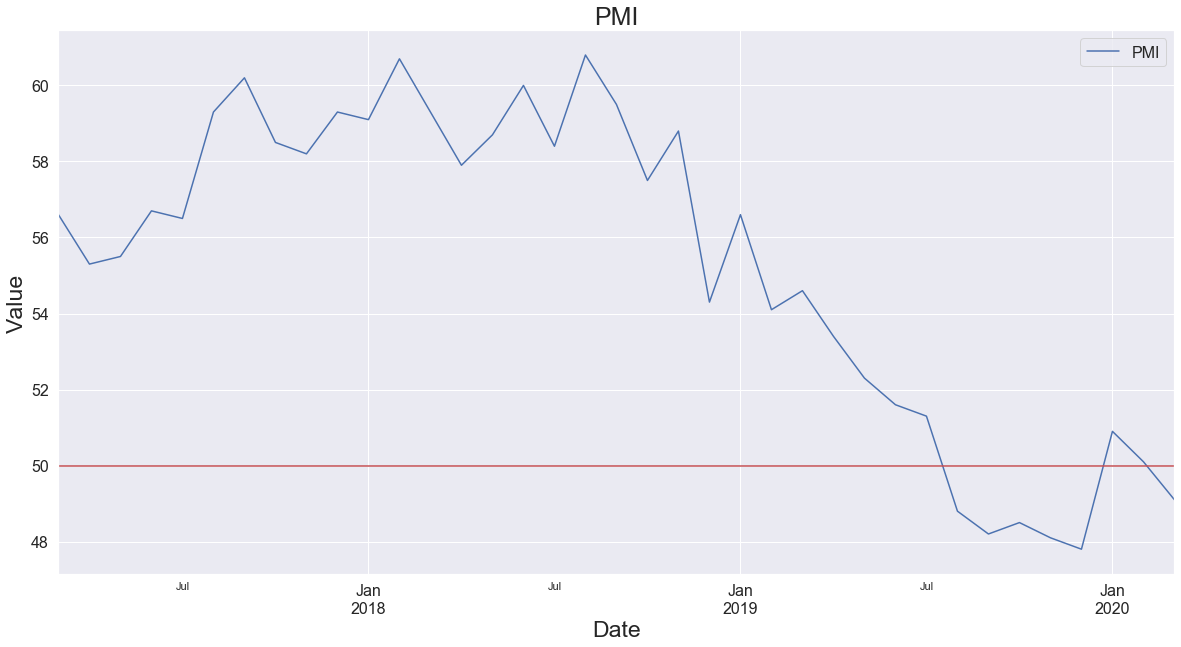

In [4]:
fig = df_PMI.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("PMI", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.axhline(50, color="r")
plt.show();

## NMI

In [5]:
df_NMI = quandl.get("ISM/NONMAN_NMI", authtoken="kFwyRwmqZyPsHBzdpNov")
df_NMI.rename(columns={'Index': "NMI"}, inplace=True)
df_NMI = df_NMI[-num_months:]
df_NMI.tail()

,NMI
Date,
2019-11-01,53.9
2019-12-01,54.9
2020-01-01,55.5
2020-02-01,57.3
2020-03-01,52.5


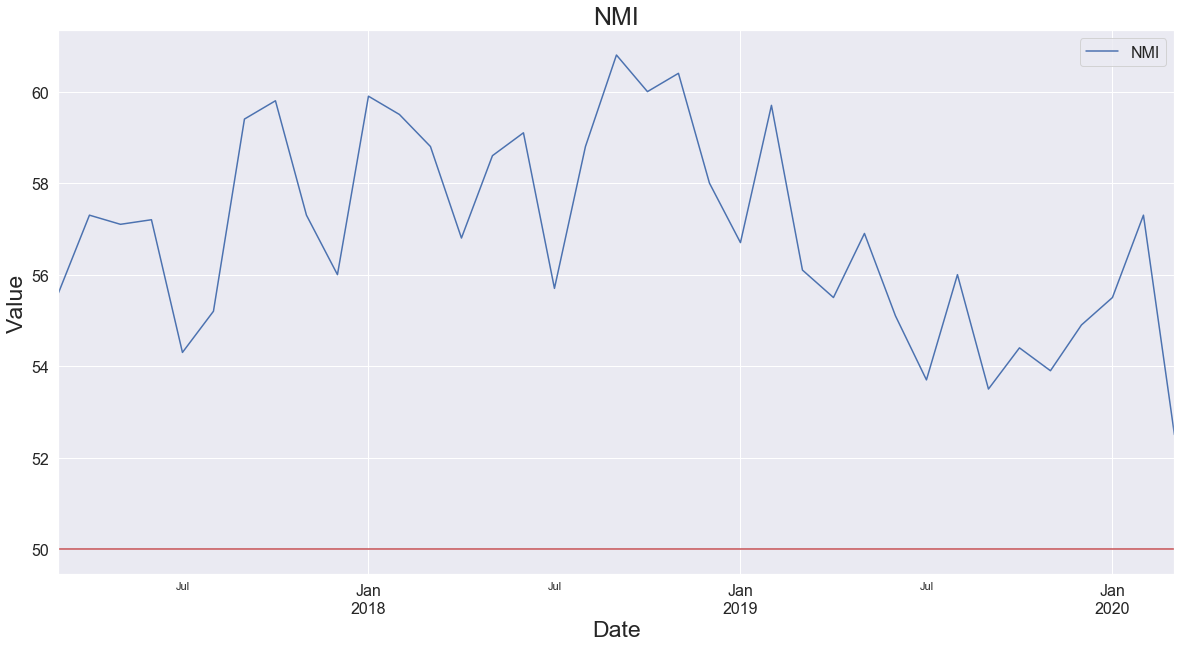

In [6]:
fig = df_NMI.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("NMI", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.axhline(50, color="r")
plt.show();

### UMCSI

In [7]:
df_UMCSI = quandl.get("UMICH/SOC1", authtoken="kFwyRwmqZyPsHBzdpNov")
df_UMCSI = df_UMCSI[::-1]
df_UMCSI.rename(columns={'Index': "UMCSI"}, inplace=True)
df_UMCSI = df_UMCSI[:num_months]
df_UMCSI.head()

,UMCSI
Date,
2020-02-29,101.0
2020-01-31,99.8
2019-12-31,99.3
2019-11-30,96.8
2019-10-31,95.5


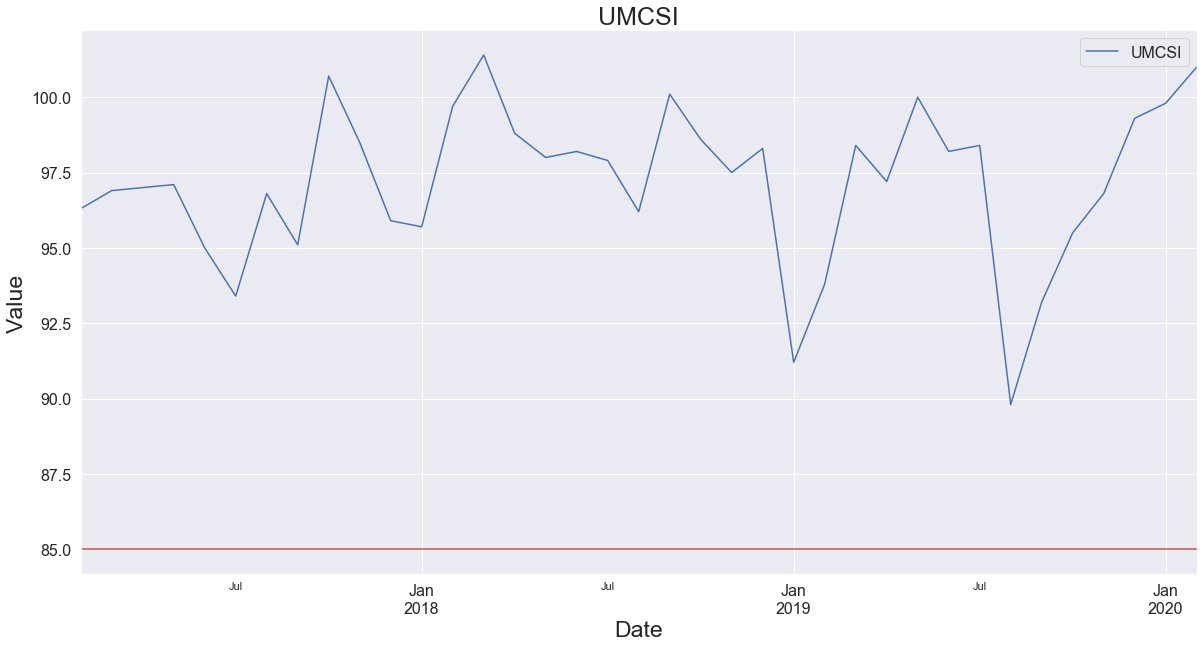

In [8]:
fig = df_UMCSI.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("UMCSI", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.axhline(85, color="r")
plt.show();

## Housing Starts

In [9]:
df_house_starts = quandl.get("FRED/HOUST", authtoken="kFwyRwmqZyPsHBzdpNov")
df_house_starts = df_house_starts[::-1]
df_house_starts.rename(columns={'Value': "Housing Starts"}, inplace=True)
df_house_starts = df_house_starts[:num_months]
df_house_starts.head()

,Housing Starts
Date,
2020-02-01,1599.0
2020-01-01,1624.0
2019-12-01,1601.0
2019-11-01,1381.0
2019-10-01,1340.0


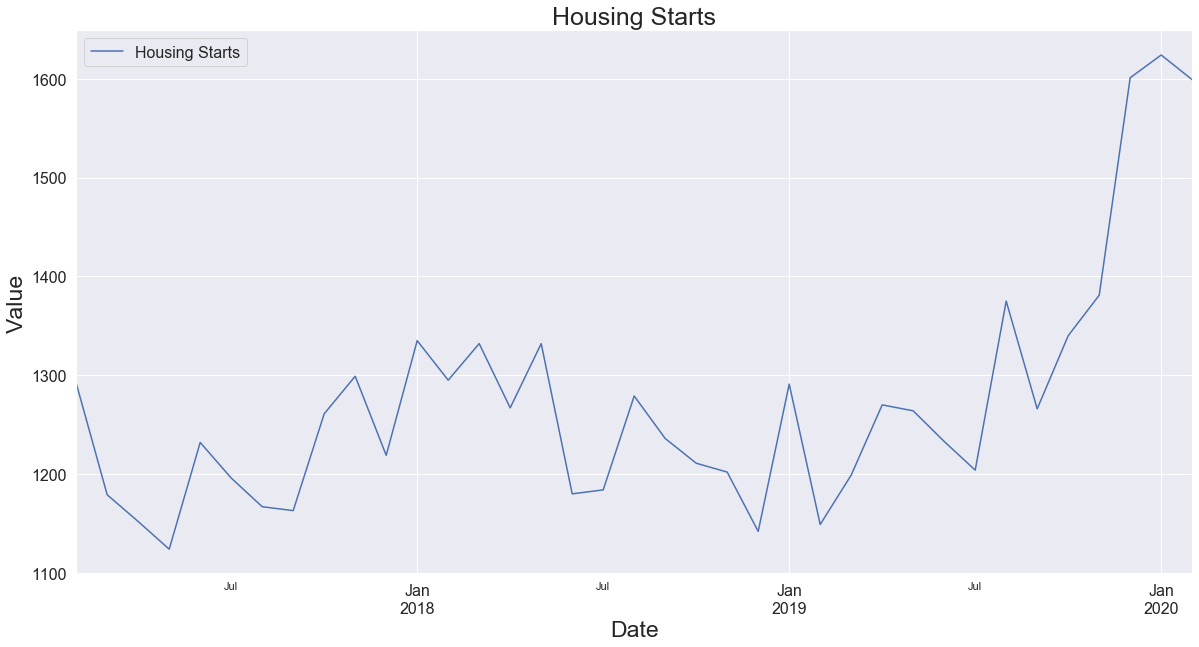

In [10]:
fig = df_house_starts.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Housing Starts", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## Money Supply (M2)

In [11]:
df_m2 = quandl.get("FRED/HOUST", authtoken="kFwyRwmqZyPsHBzdpNov")
df_m2 = df_m2[::-1]
df_m2.rename(columns={'Value': "M2"}, inplace=True)
df_m2 = df_m2[:num_months]
df_m2.head()

,M2
Date,
2020-02-01,1599.0
2020-01-01,1624.0
2019-12-01,1601.0
2019-11-01,1381.0
2019-10-01,1340.0


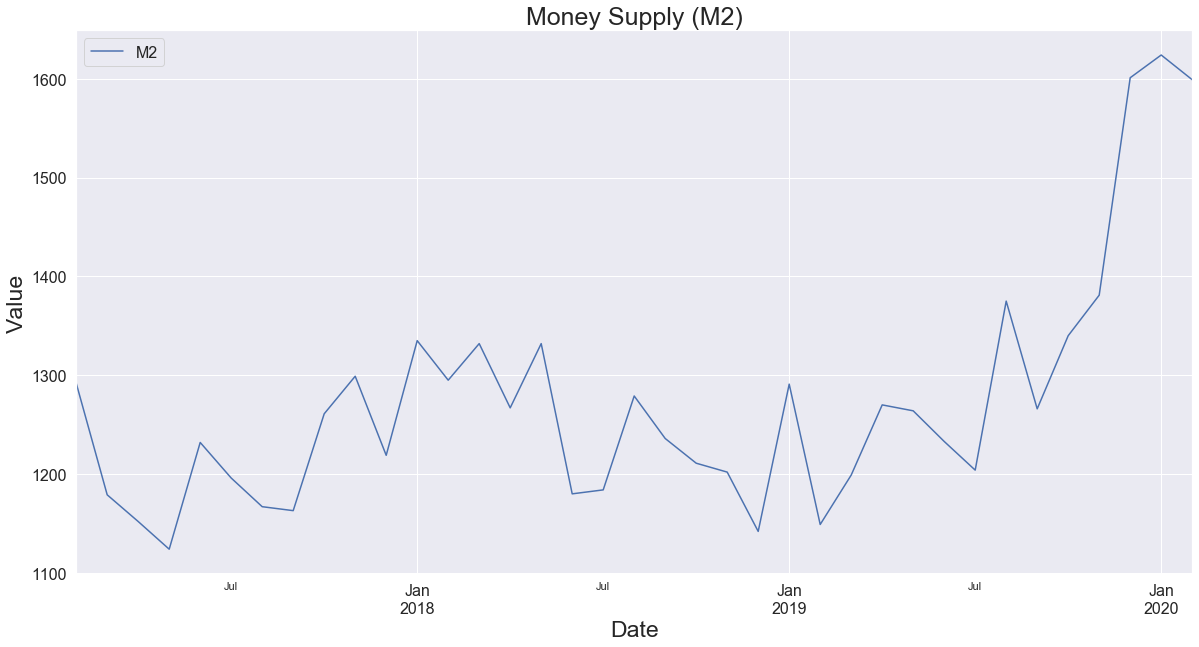

In [12]:
fig = df_m2.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Money Supply (M2)", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## Unemployment Rate

In [13]:
df_unemployment = quandl.get("FRED/UNRATE", authtoken="kFwyRwmqZyPsHBzdpNov")
df_unemployment = df_unemployment[::-1]
df_unemployment.rename(columns={'Value': "Unemployment"}, inplace=True)
df_unemployment = df_unemployment[:num_months]
df_unemployment.head()

,Unemployment
Date,
2020-02-01,3.5
2020-01-01,3.6
2019-12-01,3.5
2019-11-01,3.5
2019-10-01,3.6


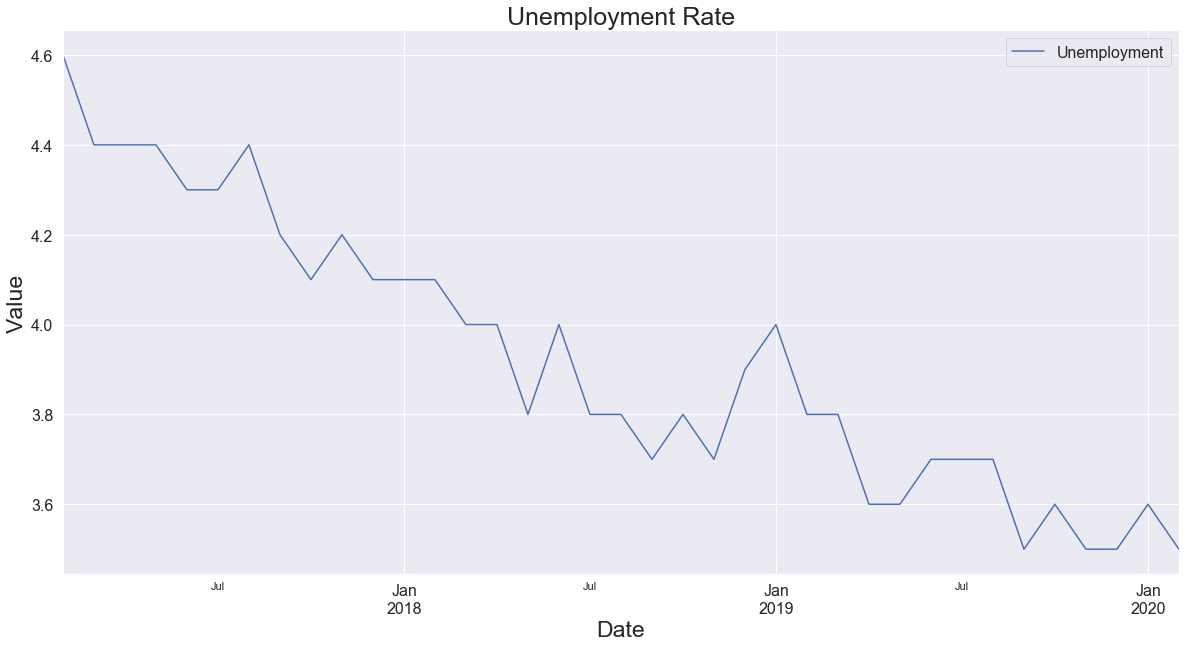

In [14]:
fig = df_unemployment.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Unemployment Rate", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## Non Farm Payroll

In [15]:
df_nonfarm = quandl.get("FRED/PAYEMS", authtoken="kFwyRwmqZyPsHBzdpNov")
df_nonfarm = df_nonfarm[::-1]
df_nonfarm.rename(columns={'Value': "NonFarm Payroll"}, inplace=True)
df_nonfarm = df_nonfarm[:num_months]
df_nonfarm.head()

,NonFarm Payroll
Date,
2020-02-01,152544.0
2020-01-01,152271.0
2019-12-01,151998.0
2019-11-01,151814.0
2019-10-01,151553.0


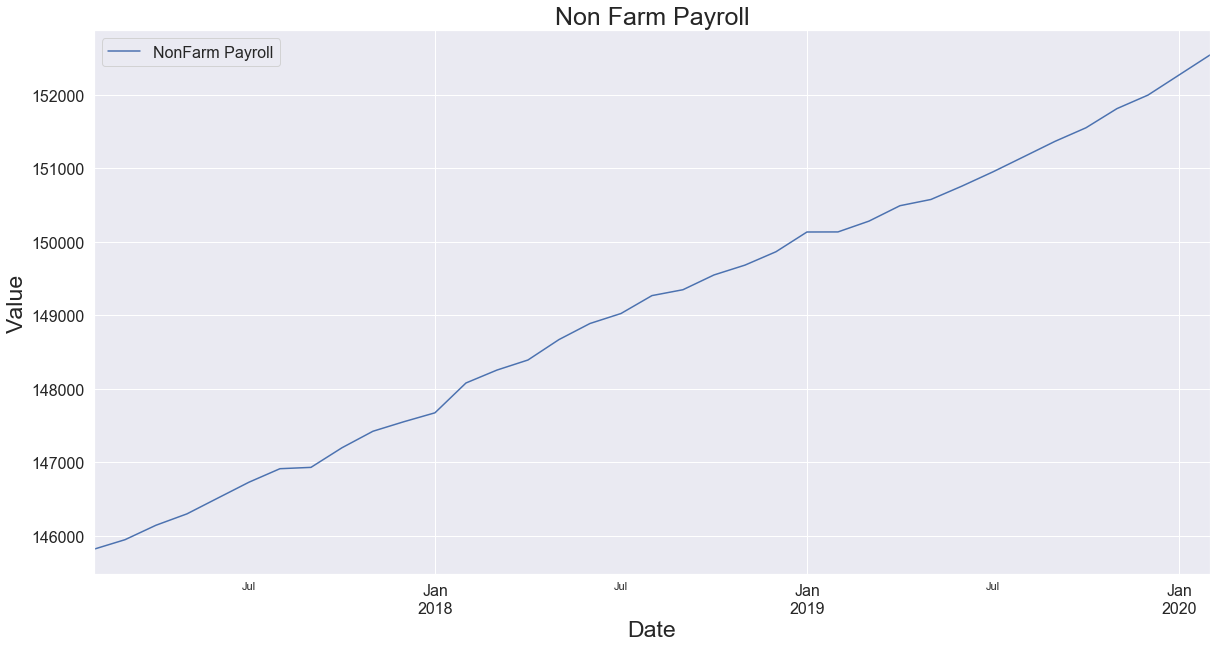

In [16]:
fig = df_nonfarm.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Non Farm Payroll", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## Consumer Price Index

In [17]:
df_market = quandl.get("YALE/SPCOMP", authtoken="kFwyRwmqZyPsHBzdpNov")
df_market = df_market[::-1]
df_market = df_market[:num_months]
df_market.drop(['S&P Composite', 'Dividend', 'Earnings', 'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings'], 1, inplace=True)
df_market.rename(columns={'Cyclically Adjusted PE Ratio': "PE"}, inplace=True)
df_market['CPI'].head()

Year
2019-12-31    257.139
2019-11-30    257.208
2019-10-31    257.346
2019-09-30    256.759
2019-08-31    256.558
Name: CPI, dtype: float64

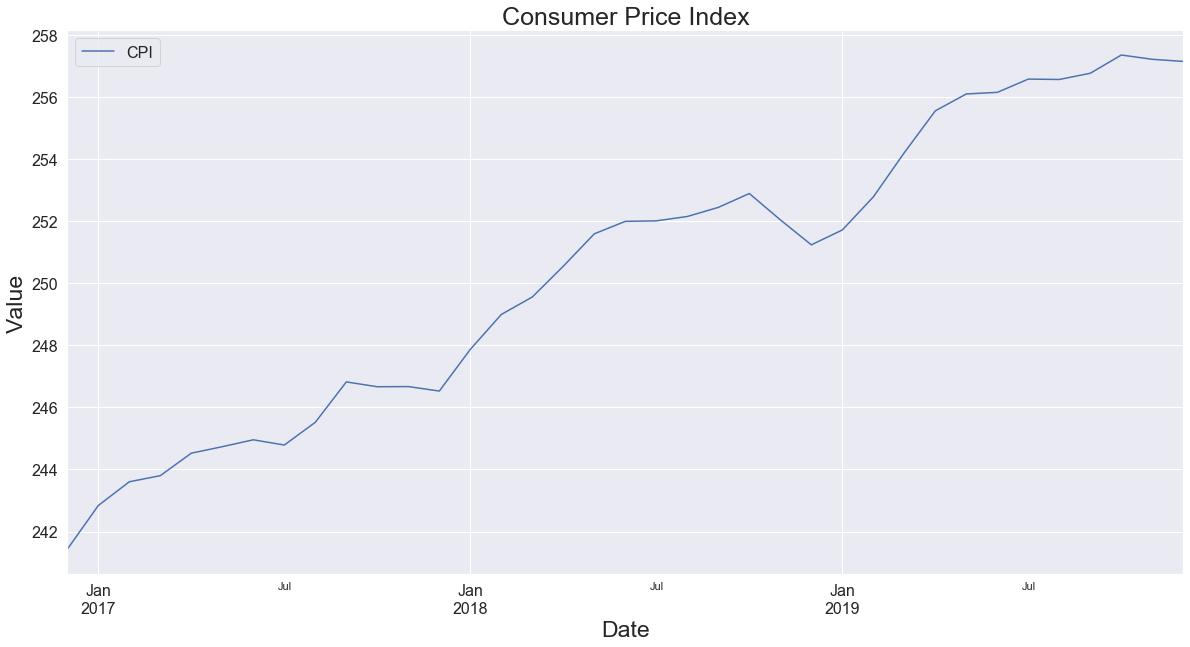

In [18]:
fig = df_market['CPI'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Consumer Price Index", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## Market PE

In [19]:
df_market['PE'].head()

Year
2019-12-31    30.913600
2019-11-30    29.911395
2019-10-31    28.840889
2019-09-30    29.229401
2019-08-31    28.705358
Name: PE, dtype: float64

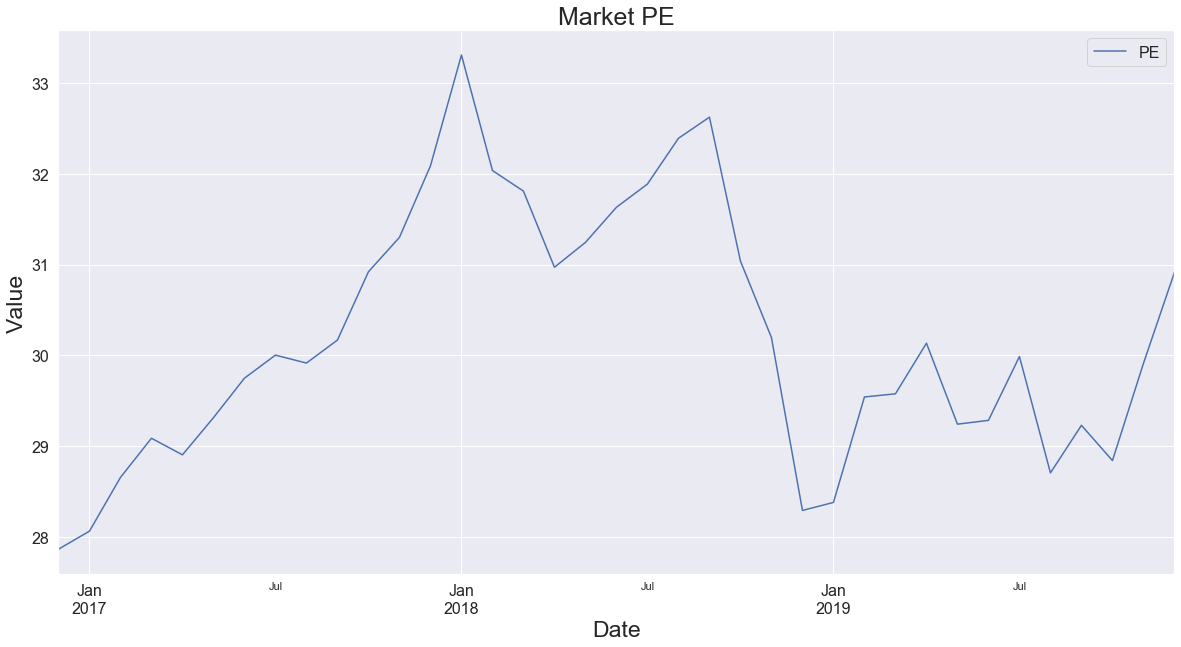

In [20]:
fig = df_market['PE'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Market PE", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## S&P500 

In [21]:
df_SP500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_SP500.rename(columns={'Adj Close': "SP500"}, inplace=True)
df_SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
df_SP500.tail()

,SP500
Date,
2020-03-30,2626.649902
2020-03-31,2584.590088
2020-04-01,2470.500000
2020-04-02,2526.899902
2020-04-03,2479.840088


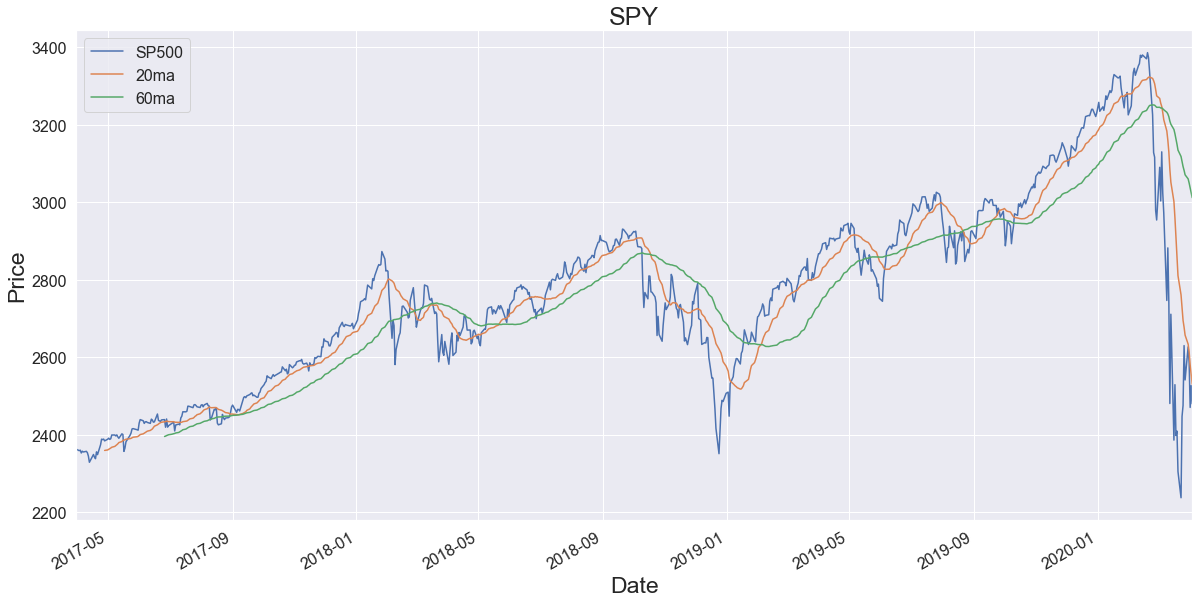

In [22]:
df_SP500['20ma'] = df_SP500['SP500'].rolling(window=20).mean()
df_SP500['60ma'] = df_SP500['SP500'].rolling(window=60).mean()
df_SP500.plot(figsize=(20, 10))
plt.xlabel("Date", fontsize=23)
plt.ylabel("Price", fontsize=23)
plt.title("SPY", fontsize=25)
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)
plt.show();

## VIX

In [23]:
df_VIX = web.DataReader("^VIX", 'yahoo', start, end)
df_VIX = df_VIX[::-1]
df_VIX.rename(columns={'Adj Close': "VIX"}, inplace=True)
df_VIX.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
df_VIX.head()

,VIX
Date,
2020-04-03,49.959999
2020-04-02,50.910000
2020-04-01,57.060001
2020-03-31,53.540001
2020-03-30,57.080002


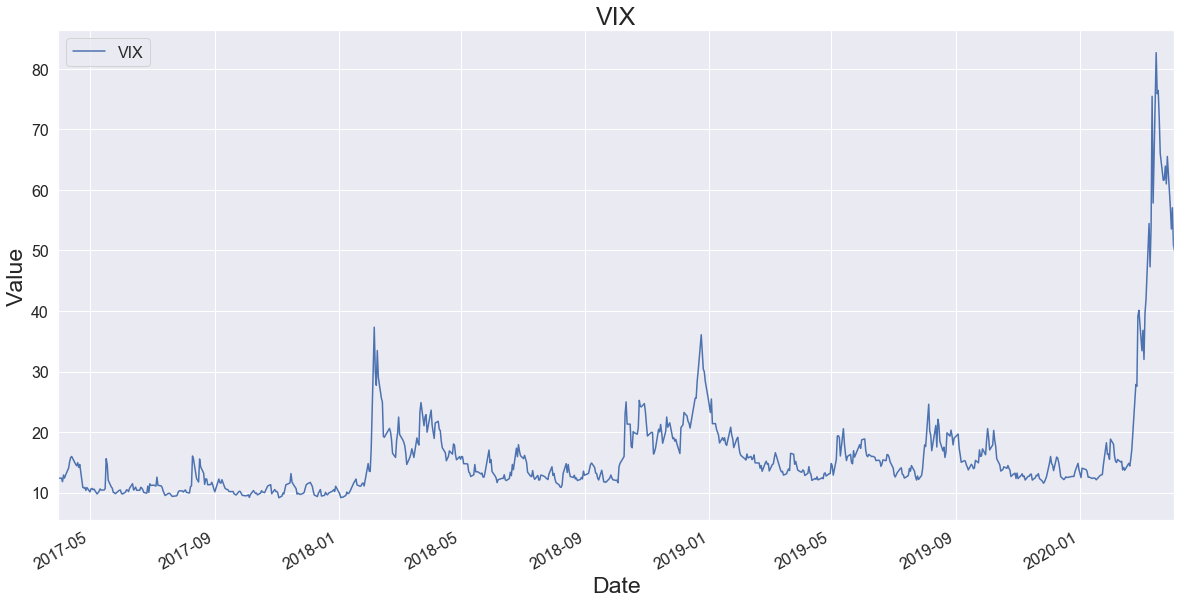

In [24]:
fig = df_VIX.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("VIX", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

## Yield Curve (10-year minus 2-year)

In [25]:
df_treasuryRates = quandl.get("USTREASURY/YIELD", authtoken="kFwyRwmqZyPsHBzdpNov")
df_treasuryRates = df_treasuryRates[::-1]
df_treasuryRates = df_treasuryRates[:num_months*20]
df_treasuryRates['TenMinusTwo'] = df_treasuryRates['10 YR'] - df_treasuryRates['2 YR']
df_treasuryRates.drop(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '20 YR', '30 YR'], 1, inplace=True)
df_treasuryRates.head()

,TenMinusTwo
Date,
2020-04-02,0.40
2020-04-01,0.39
2020-03-31,0.47
2020-03-30,0.47
2020-03-27,0.47


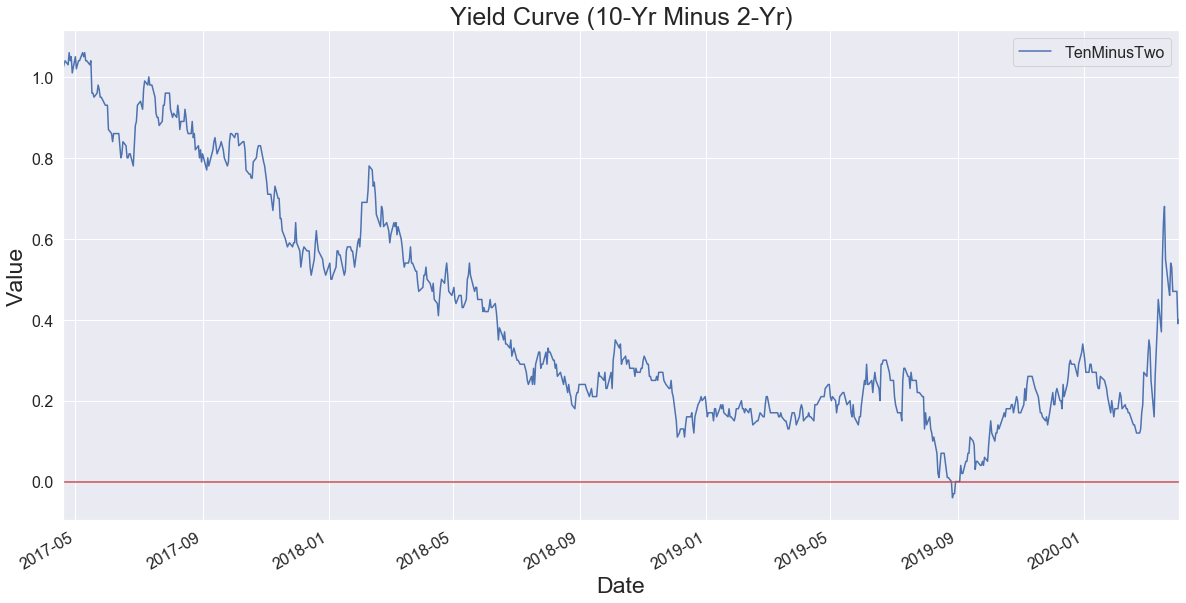

In [26]:
fig = df_treasuryRates.plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Yield Curve (10-Yr Minus 2-Yr)", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.axhline(0, color="r")
plt.show();

# Europe

## Europe Economic Sentiment

In [27]:
df_esi = quandl.get("ECBCS/ESI_ALL_MS_EU", authtoken="kFwyRwmqZyPsHBzdpNov")
df_esi = df_esi[::-1]
df_esi = df_esi[:num_months]
df_esi.head()
# This was the best data source I have found so far. It has about a 9 month lag

,Industrial confidence indicator (40%),Services confidence indicator (30 %),Consumer confidence indicator (20%),Retail trade confidence indicator (5%),Construction confidence indicator (5%),The Economic sentiment indicator is a composite measure (average = 100)
Date,,,,,,
2019-06-30,-5.9,7.0,-6.9,-0.3,3.2,102.3
2019-05-31,-3.6,7.4,-6.2,1.0,2.3,103.8
2019-04-30,-3.9,8.7,-7.3,1.1,2.4,103.6
2019-03-31,-1.4,8.1,-6.8,1.6,3.7,105.1
2019-02-28,-0.2,7.2,-6.8,0.5,4.5,105.3


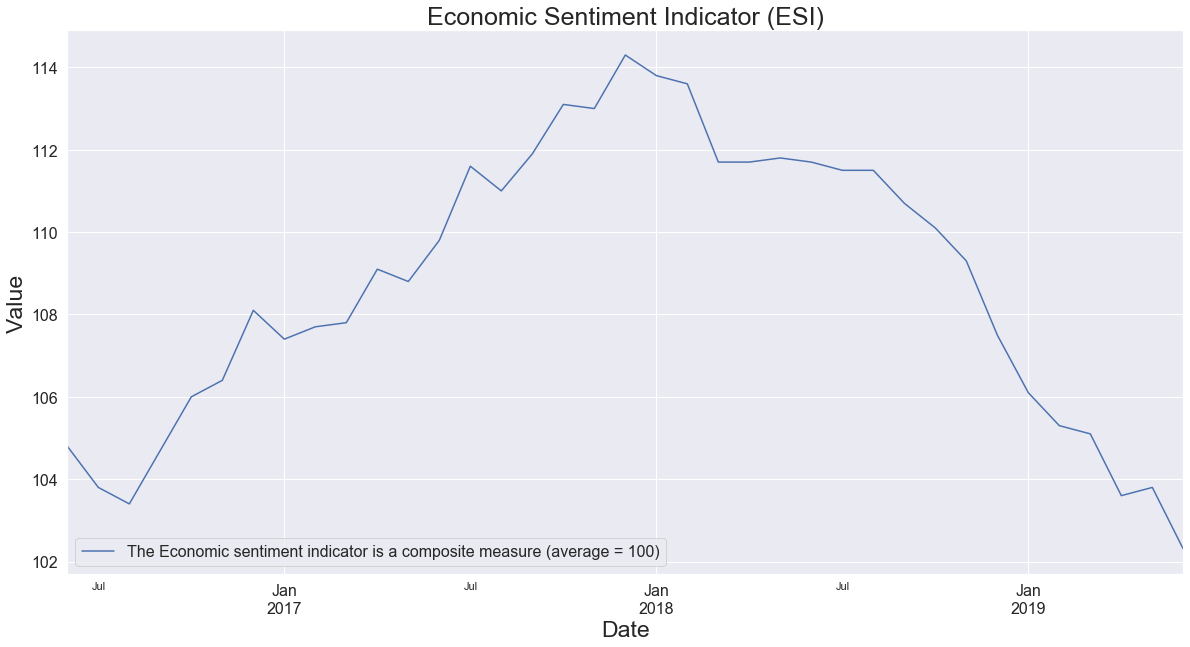

In [28]:
fig = df_esi['The Economic sentiment indicator is a composite measure (average = 100)'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Economic Sentiment Indicator (ESI)", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

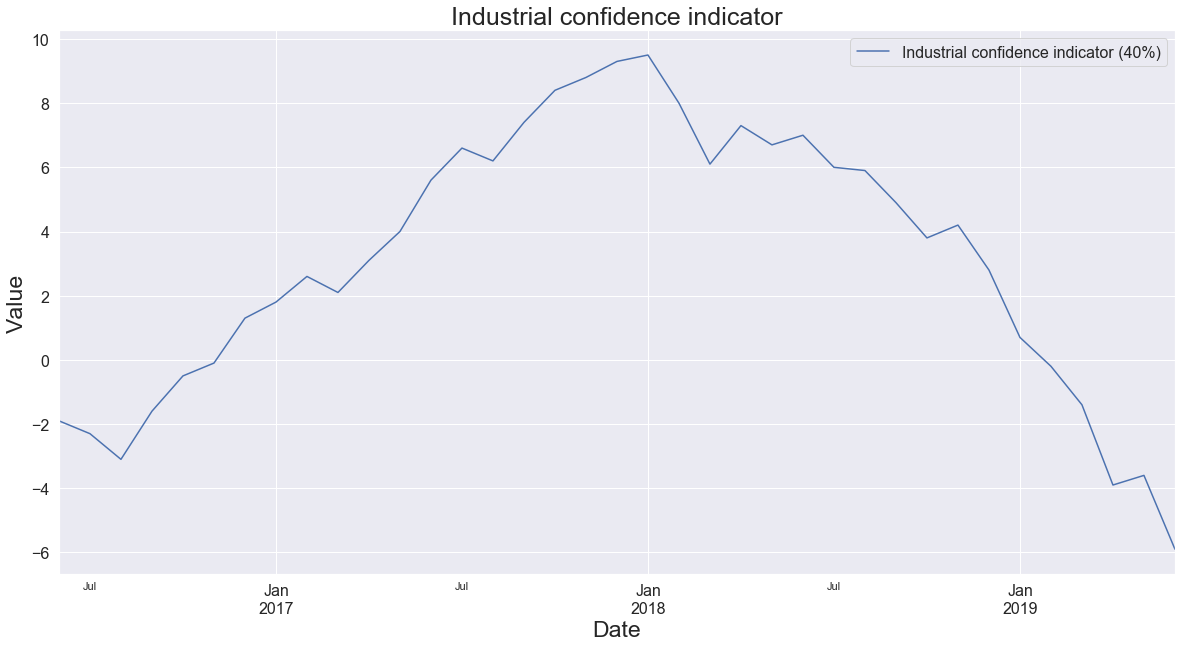

In [29]:
fig = df_esi['Industrial confidence indicator (40%)'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Industrial confidence indicator", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

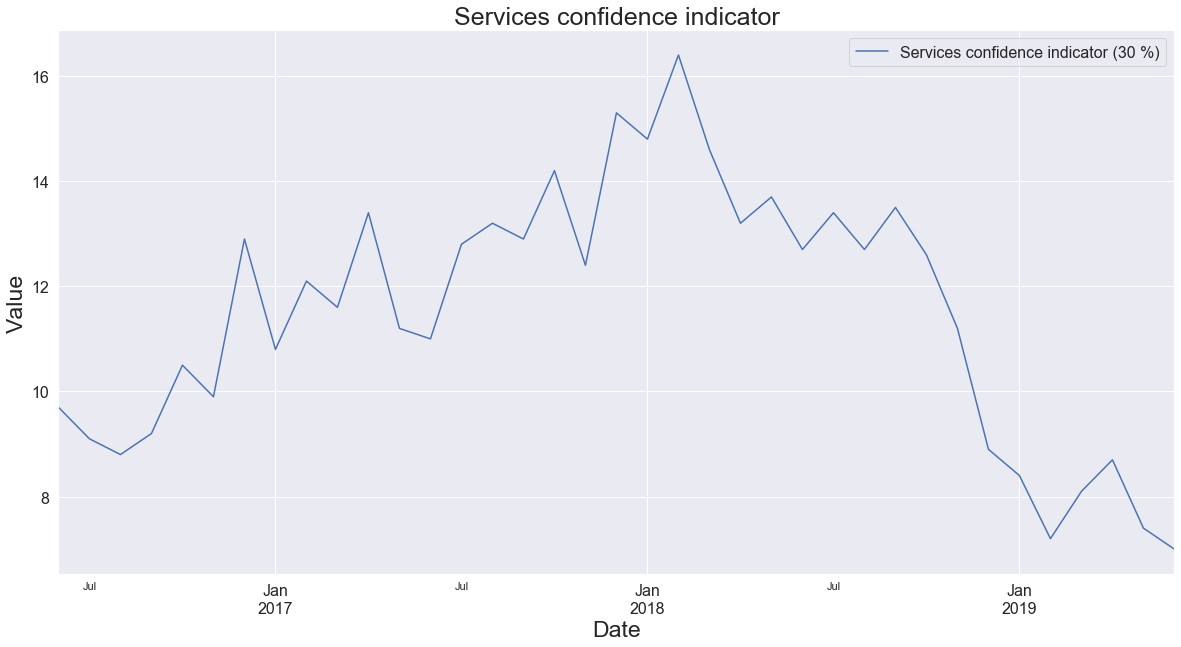

In [30]:
fig = df_esi['Services confidence indicator (30 %)'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Services confidence indicator", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

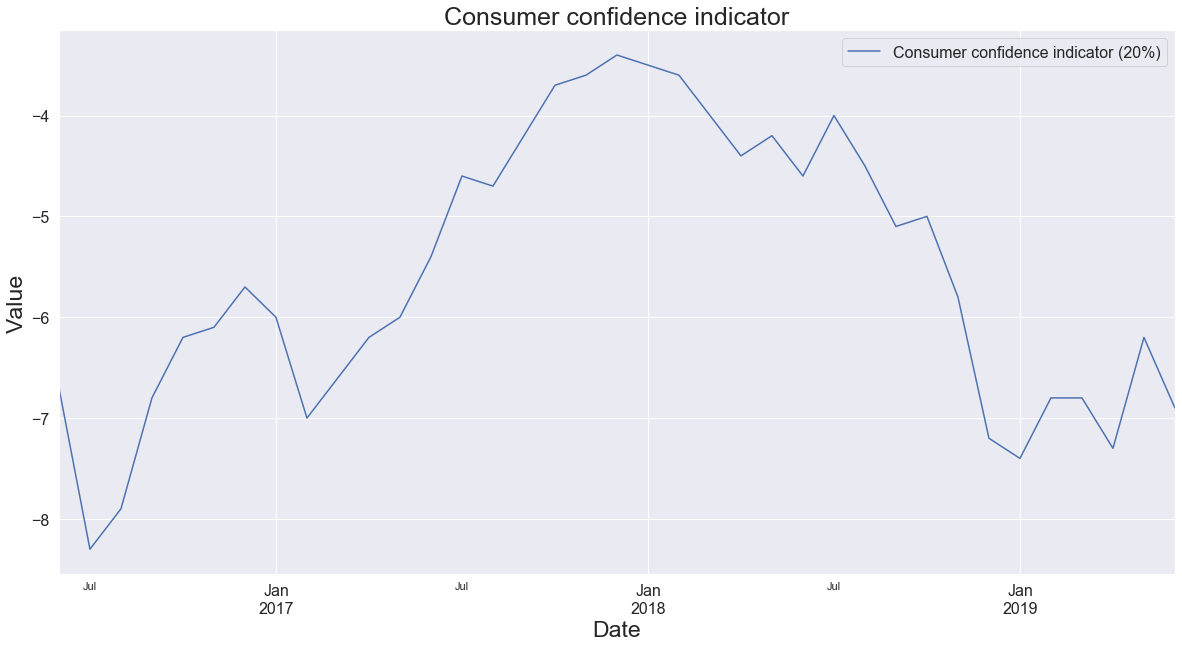

In [31]:
fig = df_esi['Consumer confidence indicator (20%)'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Consumer confidence indicator", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

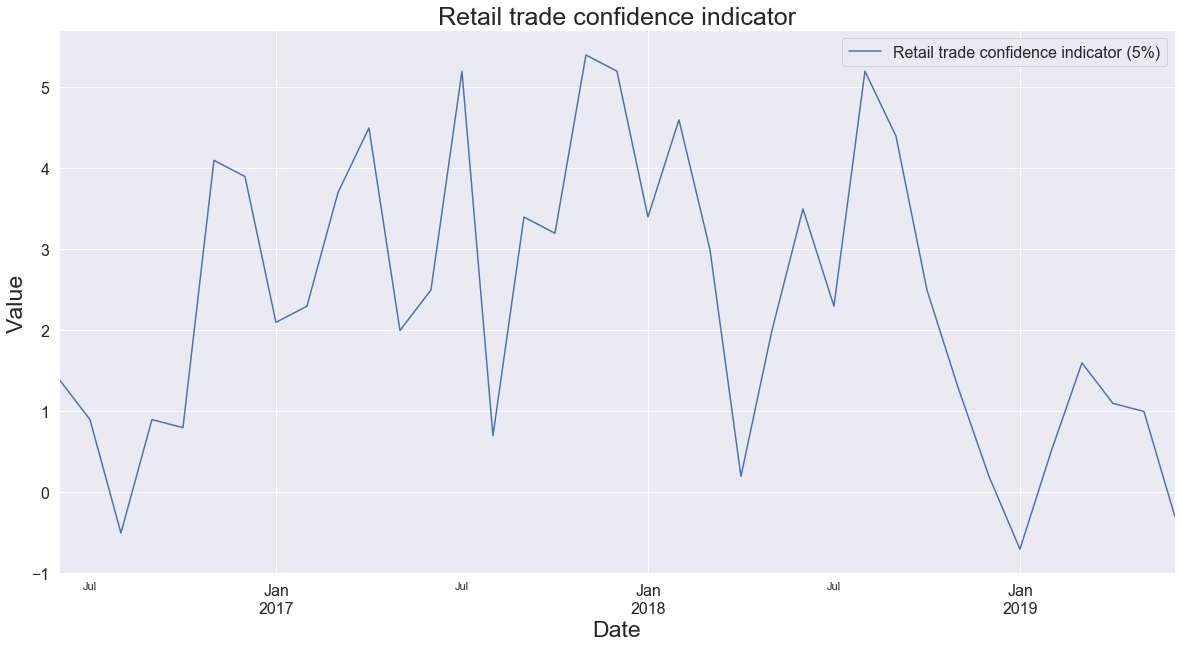

In [32]:
fig = df_esi['Retail trade confidence indicator (5%)'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Retail trade confidence indicator", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();

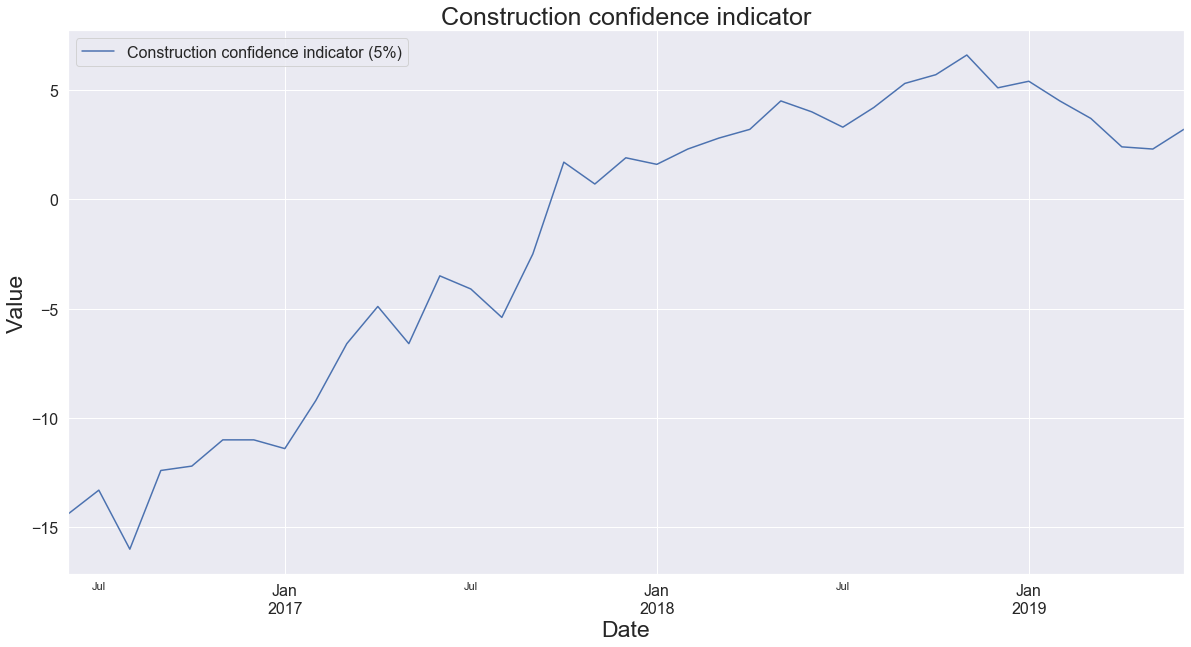

In [33]:
fig = df_esi['Construction confidence indicator (5%)'].plot(figsize=(20, 10))
fig.set_xlabel("Date", fontsize=23)
fig.set_ylabel("Value", fontsize=23)
fig.set_title("Construction confidence indicator", fontsize=25)
fig.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.show();